# Examining the Top Terms

In [1]:
import collections
from datetime import datetime
from positions import Positions, Getter
from significance import apply_fishers, contingency_table

from sklearn.metrics.pairwise import pairwise_distances
from scipy.stats import chi2_contingency

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from tf.app import use

A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
Using TF-app in /Users/cody/text-fabric-data/annotation/app-bhsa/code:
	rv1.2=#5fdf1778d51d938bfe80b37b415e36618e50190c (latest release)
	connecting to online GitHub repo etcbc/bhsa ... connected
Using data in /Users/cody/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6 (latest release)
	connecting to online GitHub repo etcbc/phono ... connected
Using data in /Users/cody/text-fabric-data/etcbc/phono/tf/c:
	r1.2 (latest release)
	connecting to online GitHub repo etcbc/parallels ... connected
Using data in /Users/cody/text-fabric-data/etcbc/parallels/tf/c:
	r1.2 (latest release)
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


## Find and Sort

In [2]:
lexs = collections.Counter()

for l in F.otype.s('lex'):
    lexs[F.lex.v(l)] += F.freq_lex.v(l)

lexs = pd.DataFrame.from_dict(lexs, orient='index', columns=['freq'])
lexs = lexs.sort_values(by='freq', ascending=False)

## Plot

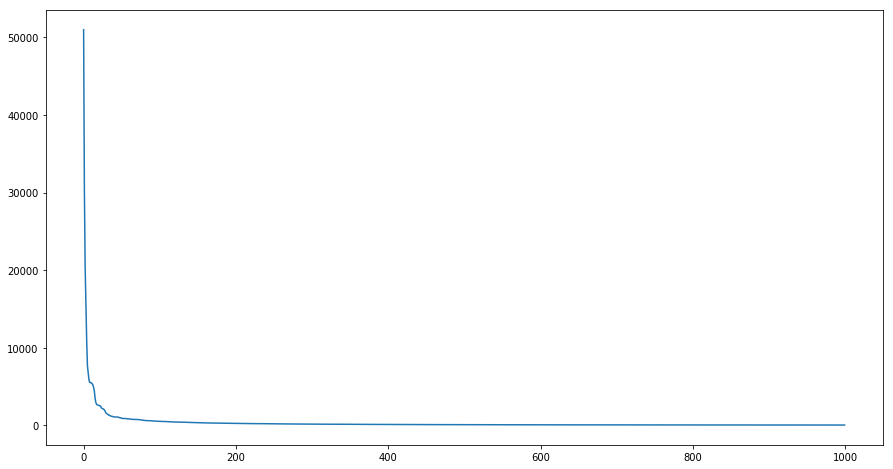

In [3]:
plot = lexs[:1000]
x = np.arange(len(plot))
y = plot.values

plt.figure(figsize=(15, 8))
plt.plot(x, y)

In [4]:
lexs[:1000]

,freq
W,51003
H,30392
L,20447
B,15768
>T,10989
MN,7681
JHWH/,6828
<L,5870
>L,5521
>CR,5500


Note that YHWH is in the top 20. But maybe this will change if we use a measure of dispersion instead.

## Measure of Dispersion

### Segment the Words

Divide the HB into segments of 100 words and observe frequency of distribution across the sections.

In [5]:
segments = []
seg_size = 100

segment = []
for w in F.otype.s('word'):
    
    segment.append(w)
    if len(segment) == seg_size:
        segments.append(segment)
        segment = []
        
segments.append(segment)

### Count Lexemes by Segment

In [6]:
seg2lex = collections.defaultdict(lambda: collections.Counter())

for i, seg in enumerate(segments):
    
    for w in seg:
        
        lex = L.u(w, 'lex')[0]
        
        seg2lex[i][F.lex.v(lex)] += 1
        
seg2lex = pd.DataFrame(seg2lex).fillna(0)

In [7]:
seg2lex.head()

,0,1,2,3,4,5,6,7,8,9,...,4256,4257,4258,4259,4260,4261,4262,4263,4264,4265
<B/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<B=/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<B==/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<BC[,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<BD/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0


### Apply DP

In [8]:
exp = seg2lex.sum() / seg2lex.sum().sum() # expected prop
obs = seg2lex.div(seg2lex.sum(1), axis=0) # observed prop
difs = abs(exp-obs) # difference exp vs. obs
dp = difs.sum(1) / 2

# DP score finalized here, NB 1- to make it more intuitive (Bigger == more distributed)
dp = 1-pd.DataFrame(dp, columns=['Degree of Dispersion']).sort_values(by='Degree of Dispersion')

### Plot and Analyze

In [9]:
dp.shape

(8773, 1)

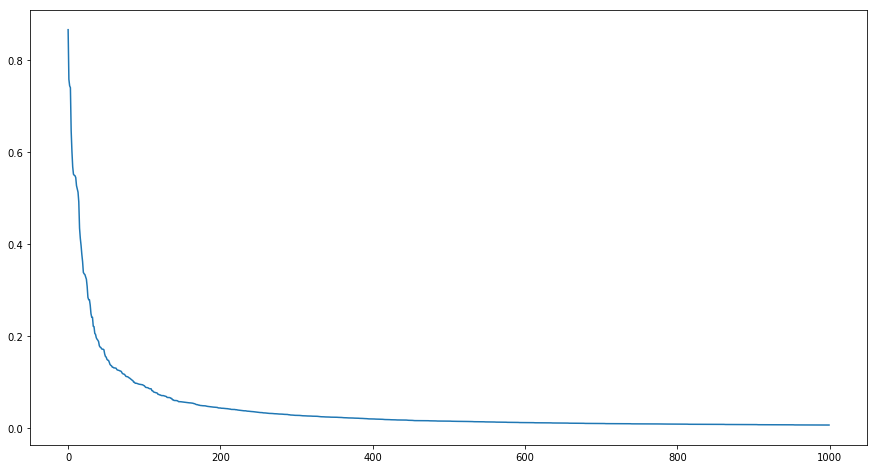

In [10]:
plot = dp[:1000]

x = np.arange(plot.shape[0])
y = plot.values

plt.figure(figsize=(15, 8))
plt.plot(x, y)

We see a much smoother drop off compared to the raw frequencies. It appears most drop-off occurs from 0 to 200.

In [11]:
dp.head(100)

,Degree of Dispersion
W,0.866434
L,0.758567
B,0.744386
H,0.740358
MN,0.646352
>T,0.602051
<L,0.568637
>CR,0.552230
JHWH/,0.549956
KL/,0.548928


# Vector Experiment

In [15]:
def get_window(word):
    '''
    Build a contextual window, return context words.
    '''
    window = 3
    context = 'sentence'
    confeat = 'lex'
    P = Positions(word, context, A).get
    fore = list(range(-window, 0))
    back = list(range(1, window+1))
    conwords = []
    for pos in (fore + back):
        cword = P(pos, confeat)        
        if cword:
            conwords.append(f'{pos}.{cword}')
    return conwords

wordcons = collections.defaultdict(lambda:collections.Counter())

topwords = set(dp.index[:100])

for w in F.otype.s('word'):
    
    if F.lex.v(w) not in topwords:
        continue
    
    context = get_window(w)
    wordcons[F.lex.v(w)].update(context) 

In [16]:
wordcons = pd.DataFrame(wordcons).fillna(0)

In [17]:
wordcons.head()

,B,>LHJM/,>T,H,W,>RY/,HJH[,<L,PNH/,MJM/,...,>L=,MLK/,KHN/,KH,<MD[,JHWDH/,JFR>L/,MCH=/,JRWCLM/,DWD==/
-1.<B/,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1.<B=/,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1.<B==/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1.<BD/,21.0,1.0,16.0,57.0,177.0,0.0,10.0,6.0,1.0,0.0,...,4.0,4.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,28.0
-1.<BD=/,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
wordcons.shape

(41204, 100)

In [19]:
wordcons.shape[0] * wordcons.shape[1]

4120400

In [20]:
data = wordcons

### Prune the Contexts

Some contexts are exclusive to a single word. We throw away all contexts that are not shared by any other word. This reduces the amount of empty space in the dataset, in turn enabling closer connections between words. It also helps with efficiency.

In [47]:
# colex_counts = wordcons.sum(1)
# remaining_counts = wordcons.sub(colex_counts, axis=0) # subtract colex_counts
# hapax_colex = remaining_counts[(remaining_counts == 0).any(1)] # select rows that have a 0 value anywhere

Here is how much data is to be pruned:

In [48]:
# hapax_colex.shape

An example is found below.

In [49]:
# wordcons.loc['-1.<B==/'].sort_values(ascending=False).head(5)

In [50]:
# data = wordcons.drop(labels=hapax_colex.index, axis=0)

# print(f'New data dimensions: {data.shape}')
# print(f'New total iterations: {data.shape[0] * data.shape[1]}')
# print(f'New total observations: {data.sum().sum()}')
# print(f'Observations removed: {wordcons.sum().sum() - data.sum().sum()}')
# print(f'Iterations avoided: {wordcons.shape[0] * wordcons.shape[1]}')

In [51]:
# data.head()

### Apply Normalizations

We need an efficient (i.e. simple) normalization method for such a large dataset. ΔP is such a test that includes contingency information.

In [21]:
# contingency table
ct = contingency_table(data)

In [22]:
ct.keys()

dict_keys(['a', 'b', 'c', 'd', 'expected'])

In [23]:
a = data
b = ct['b']
c = ct['c']
d = ct['d']

In [24]:
deltap = (a/(a+b)) - (c/(c+d)).fillna(0)

In [25]:
distances_raw = pairwise_distances(np.nan_to_num(deltap.T.values), metric='cosine')

In [26]:
dist = pd.DataFrame(distances_raw, columns=data.columns, index=data.columns)

In [27]:
dist['B'].sort_values().head()

B     0.000000
<L    0.373914
K     0.444336
>T    0.449470
<D    0.545414
Name: B, dtype: float64

In [28]:
deltap['H'].sort_values(ascending=False).head(10)

-1.B      0.020181
2.W       0.012341
2.>CR     0.011900
-1.>T     0.011174
2.H       0.008571
1.>RY/    0.007199
1.MLK/    0.007135
-1.KL/    0.006979
-3.H      0.006170
1.JWM/    0.006062
Name: H, dtype: float64

In [31]:
dist['B'].sort_values()

B          0.000000
<L         0.373914
K          0.444336
>T         0.449470
<D         0.545414
KL/        0.554973
MN         0.586481
L          0.675487
>L         0.676063
R>C/       0.731917
>XR/       0.788264
DBR/       0.803112
<M         0.853688
CNJM/      0.864401
JWM/       0.873042
>T==       0.911963
CM         0.941383
>JC/       0.976178
CNH/       1.002633
DRK/       1.007044
<WD/       1.007408
CM/        1.009303
<JR/       1.012684
CLC/       1.020598
PNH/       1.029701
YWH[       1.033665
BJT/       1.050051
<LH[       1.074267
BN/        1.079939
KH         1.083704
             ...   
KHN/       1.169133
>M         1.171389
<BD/       1.177768
<MD[       1.180661
HLK[       1.184559
>JN/       1.184678
DWD==/     1.185339
HJH[       1.185976
>TH        1.186110
JFR>L/     1.188045
LQX[       1.189703
PH/        1.190745
CWB[       1.192204
L>         1.194227
>B/        1.195136
CLX[       1.201104
<BR[       1.202282
>RY/       1.208063
DBR[       1.209269


## Compare with Top

In [35]:
def getlex(lexstring):
    return next((l for l in F.otype.s('lex') if F.lex.v(l) == lexstring), None)

In [74]:
top = dp.head(200).index

links = collections.defaultdict(list)

for lex in dist.columns:
    
    if lex in top:
        continue
        
    shortest = dist[lex][top].sort_values()[:1]
        
    distance,linklex = shortest[0], shortest.index[0]
    
    links[linklex].append((distance, lex))
    
len(links)

158

In [72]:
utf8 = lambda l: F.lex_utf8.v(L.d(l ,'word')[0])

for lex in top:
    
    lexn = getlex(lex)
    surf = utf8(lexn)
    lexlinks = links[lex]

    print(f'{surf} {F.gloss.v(lexn)}\t{len(lexlinks)} links')
    print()
    
    for ll in sorted(lexlinks):
        
        distance, colex = ll
        colex = getlex(colex)
        show_ll = f'{utf8(colex)} - {F.gloss.v(colex)} - {F.lex.v(colex)}'
        
        print('\t', (round(distance, 2), show_ll))
        
    print()
    print('-'*30)
    print()

ו and	1 links

	 (0.8, 'הוי - alas - HWJ')

------------------------------

ל to	1 links

	 (0.84, 'חנם - in vain - XNM')

------------------------------

ב in	6 links

	 (0.59, 'משׁפחת - clan - MCPXT/')
	 (0.59, 'פשׂה - spread - PFH[')
	 (0.6, 'אצל - side - >YL/')
	 (0.7, 'אשׁר - happiness - >CR=/')
	 (0.77, 'ארר - curse - >RR[')
	 (0.85, 'ענו - humble - <NW/')

------------------------------

ה the	6 links

	 (0.78, 'מול - front - MWL/')
	 (0.81, 'עוג - Og - <WG/')
	 (0.83, 'סיחון - Sihon - SJXWN/')
	 (0.84, 'נבוכדנאצר - Nebuchadnezzar - NBWKDN>YR/')
	 (0.86, 'סלת - wheat groat - SLT/')
	 (0.88, 'נבוכדראצר - Nebuchadnezzar - NBWKDR>YR/')

------------------------------

מן from	1 links

	 (0.81, 'אנושׁ - man - >NWC/')

------------------------------

את <object marker>	3 links

	 (0.69, 'בעד - distance - B<D/')
	 (0.78, 'איה - where - >JH')
	 (0.81, 'צעקה - cry - Y<QH/')

------------------------------

על upon	1 links

	 (0.76, 'קצה - end - QYH/')

------------------------------

אש

## Export Data for Gephi Analysis

In [48]:
import csv

In [49]:
sims = dist.copy()

for i in dist:
    for j in dist:
        distance = dist[i][j]
        if distance >= 0:
            sims[i][j] = 1-distance
        else:
            sims[i][j] = -1*(1-distance)

In [54]:
node_maps = {}
nodes = []
edges = []

# make nodes
for i,word in enumerate(sims):
    lexn = getlex(word)
    label = F.voc_lex_utf8.v(lexn)
    nodes.append([i, label])
    node_maps[word] = i
    
# make edges
for word in sims.columns:

    these_sims = sims[word][sims[word] > 0]

    for coword in these_sims.index:
        source = node_maps[word]
        target = node_maps[coword]
        weight = sims[word][coword]
        edges.append([source, target, weight])

# export csv's
with open('top_nodes.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['ID', 'Label'])
    writer.writerows(nodes)

with open('top_sim_edges.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Source', 'Target', 'Weight'])
    writer.writerows(edges)

## Dendrogram of Top Nouns

In [59]:
dendata = data.T

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [70]:
links = linkage(dendata, metric='cosine', method='complete')

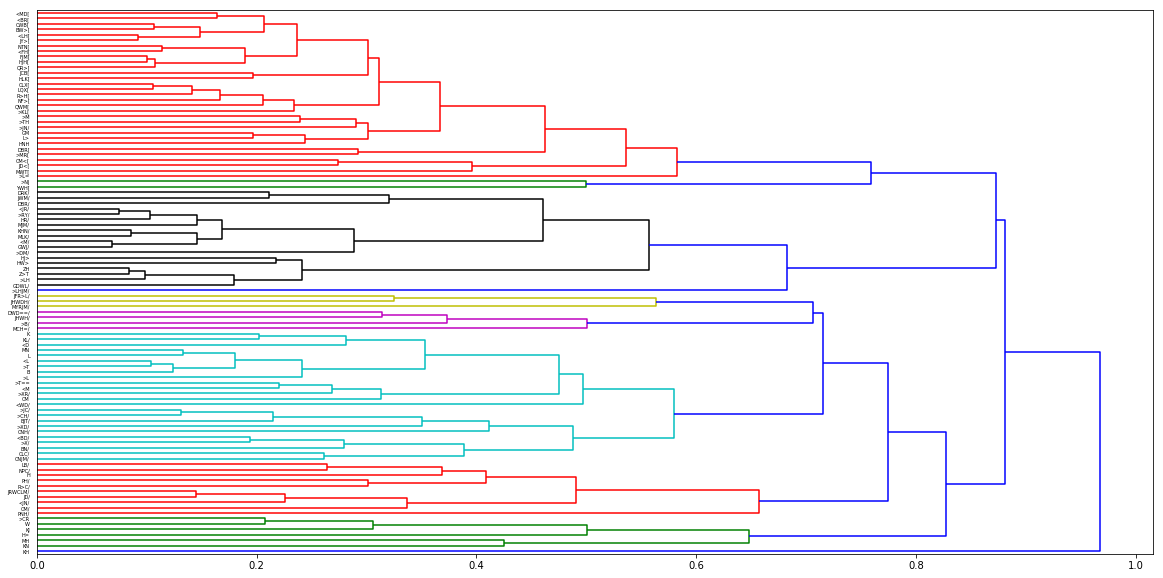

In [76]:
plt.figure(figsize=(20, 10))
dendrogram(links, labels=dendata.index, orientation='right')
plt.savefig('top_words.png', dpi=300, bbox_inches='tight')
plt.show()